In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
test_data = pd.read_csv("dataset/drugsComTest_raw.csv")

In [6]:
test_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [13]:
test_data.columns


Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [9]:
test_data['review'][0]

'"I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me."'

In [18]:
test_data[['drugName','condition','rating']].duplicated().sum()

37933

In [19]:
drug_data = test_data['drugName']

In [22]:
len(drug_data.unique())

2637

In [50]:
condition_drug = drug_data.groupby(test_data['condition']).nunique().sort_values(ascending=False)
condition_drug[:-5]

condition
Pain                         163
Birth Control                155
Not Listed / Othe            111
High Blood Pressure           99
Depression                    97
                            ... 
Breast Cancer, Palliative      1
Urinary Retention              1
Submental Fullness             1
Pulmonary Edema                1
Uterine Bleeding               1
Name: drugName, Length: 703, dtype: int64

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

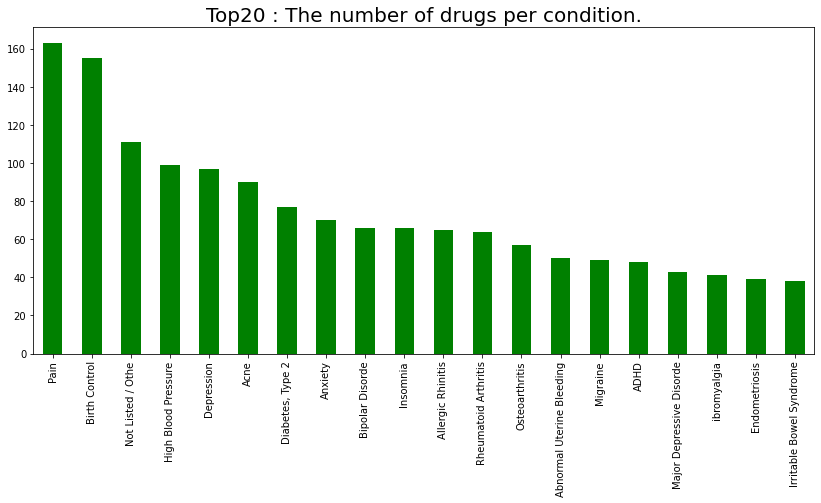

In [51]:
condition_drug[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

In [52]:
drug_condition = test_data.groupby(test_data['drugName'])['condition'].nunique().sort_values(ascending=False)
drug_condition[:-5]

drugName
Prednisone                 26
Gabapentin                 26
Amitriptyline              19
Venlafaxine                18
Doxycycline                17
                           ..
Mevacor                     1
Miacalcin Nasal             1
Mibelas 24 Fe               1
Micardis HCT                1
Miconazole / zinc oxide     1
Name: condition, Length: 2632, dtype: int64

Text(0.5, 1.0, 'Top20 : The number of conditions dealt by drugs.')

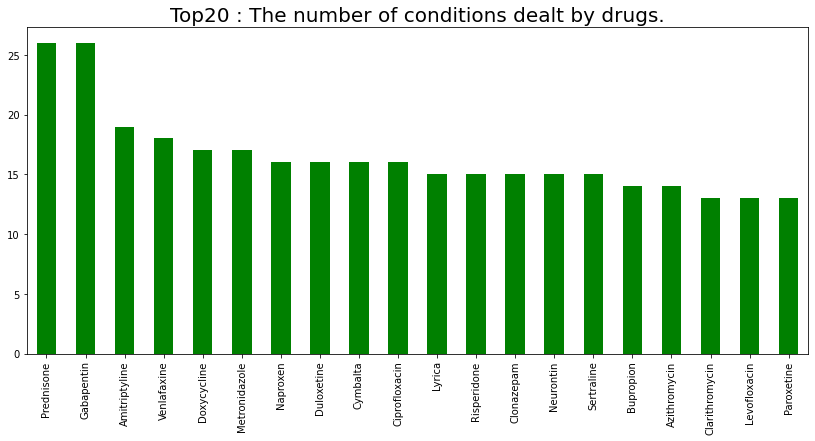

In [54]:
drug_condition[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of conditions dealt by drugs.", fontsize = 20)

In [60]:
test_data.isna().sum()

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [61]:
test_data.dropna(inplace=True)

In [101]:
temp = test_data['rating'].groupby(test_data['drugName'], sort=False)

In [90]:
for drugName,list_of_rating in temp:
    print(drugName)
    print(list_of_rating)
    break

Mirtazapine
0        10
366      10
742       7
1286      9
1477     10
         ..
50466    10
50726    10
51440    10
52932     8
53221     8
Name: rating, Length: 178, dtype: int64


In [102]:
d = []
r = []
for drug, rating in temp:
    if len(rating) > 100:
        d.append(drug)
        r.append(np.mean(rating))

list1, list2 = (list(t) for t in zip(*sorted(zip(r, d))))

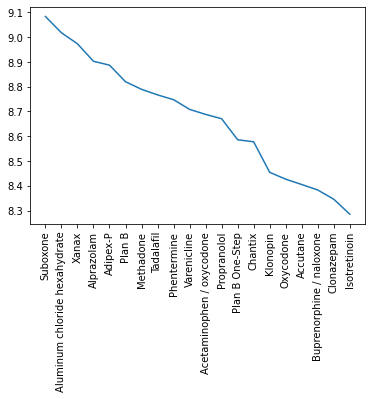

In [109]:
plt.plot(list2[::-1][:20],list1[::-1][:20])
plt.xticks(rotation=90)
plt.show()

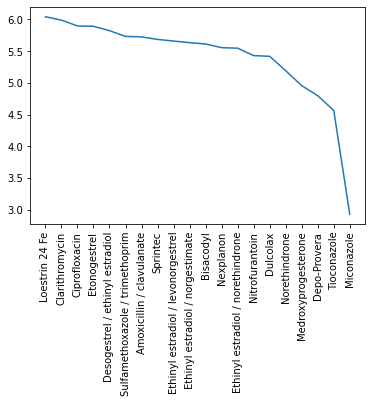

In [112]:
plt.plot(list2[::-1][-20:],list1[::-1][-20:])
plt.xticks(rotation=90)
plt.show()

In [124]:
pain_data = test_data[test_data['condition'] == 'Pain']
temp = pain_data.groupby(['drugName'], sort=False)['drugName']
temp

In [128]:
for drugName,list_of_rating in temp:
        print(drugName)
        break

Duloxetine
